<a href="https://colab.research.google.com/github/fataik1/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Fatai's_LS_DS_431_Intro_to_NN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### **Input Layer**: An input layer is where we recieve our input from the dataset. It is also exposed to our data and interacts with it directly. A nueral network  is usually drawn with a visible layer with one neuron per input value or column in the dataset.  

### **Hidden Layer**: Hidden layers are not exposed to the input. The simplest network structure is to have a single neuron in the hidden layer that directly outputs the value. 


### **Output Layer**: The output layer or otherwise known as the final layer is  responsible for outputting a value or vector of values that correspond to the format required. 

### **Neuron**:  building block for neural networks are neurons. A neuron may have two inputs in which case it requires three weights. 

### **Weight**: They are often initialized to small random values, such as values in the range 0 to 0.3, although more complex initialization schemes can be used.

### **Activation Function**:  mapping of summed weighted input to the output of the neuron. It is called an activation function because it governs the threshold at which the neuron is activated and strength of the output signal.

### **Node Map**: a visual diagram of the architecture. It's like a flow chart in that it shows the path from inputs to outputs. They are usually color coded and help us understand at a very high level, some of the differences in architecture between kinds of neural networks.

### **Perceptron**: A perceptron is a single neuron model that was a precursor to larger neural networks.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [0]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [0]:
##### Your Code Here #####

#First lets define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [0]:
#now we want to add our inputs
one = df['x1'].to_list()
two = df['x2'].to_list()
inputs = np.array([one, two])
inputs 

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [0]:
#outputs
outputs = np.array([df['y'].to_list()])
outputs

array([[1, 1, 1, 0]])

In [0]:
#Now we want to grab random weights for each input
weights = np.random.random((4,1))
weights

array([[0.60091343],
       [0.22631564],
       [0.17729365],
       [0.23131756]])

In [0]:
# weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.45763319],
       [0.4086112 ]])

In [0]:
#Output the activated value
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.61245255],
       [0.60075482]])

In [0]:
# error take difference of output and true values to calculate error
error = outputs - activated_output
error

array([[ 0.38754745,  0.38754745,  0.38754745, -0.61245255],
       [ 0.39924518,  0.39924518,  0.39924518, -0.60075482]])

In [0]:
# gradient descent/backpropagation
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments

array([[ 0.0919861 ,  0.0919861 ,  0.0919861 , -0.14536832],
       [ 0.09575834,  0.09575834,  0.09575834, -0.14409012]])

In [0]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[ 0.60091343,  0.60091343,  0.60091343,  0.60091343],
       [ 0.31830174,  0.31830174,  0.31830174,  0.08094731],
       [ 0.27305199,  0.27305199,  0.27305199,  0.03320352],
       [ 0.419062  ,  0.419062  ,  0.419062  , -0.05814089]])

In [0]:
# iteration to reduce error
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)


Weights after training
[[ 0.60091343  0.60091343  0.60091343  0.60091343]
 [ 1.88845554  1.88845554  1.88845554 -1.77091904]
 [ 1.88567948  1.88567948  1.88567948 -1.77341965]
 [ 3.6018433   3.6018433   3.6018433  -3.71663042]]
Output after training
[[0.99589014 0.99589014 0.99589014 0.00412113]
 [0.99587876 0.99587876 0.99587876 0.00411088]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [0]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


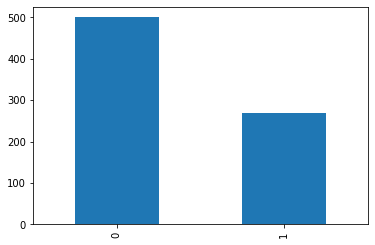

In [0]:
# plot outcome
%matplotlib inline
diabetes['Outcome'].value_counts().plot(kind='bar')

In [0]:
diabetes['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [0]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

# test splits
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# scale the data
mmscaler = MinMaxScaler()

# fit the data
X_scaled = pd.DataFrame(mmscaler.fit_transform(X), columns=feats)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [0]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sig_x = self.__sigmoid(x)
        return sig_x * (1 - sig_x)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weights = np.random.random((X.shape[1], 1))
        self.inputs = X.values.tolist()
        self.outputs = y.values.tolist()


        for i in range(self.niter):
            # Weighted sum of inputs / weights
            self.weighted_sum = np.dot(self.inputs, self.weights)

            # Activate!
            self.activated_outputs = self.__sigmoid(self.weighted_sum)

            # Cac error
            self.error = self.outputs - self.activated_outputs
            self.adjustments = self.error * self.__sigmoid_derivative(self.weighted_sum)

            # Update the Weights
            self.weights = self.weights + np.dot(np.array(self.inputs).T, self.adjustments)

        return self

    def net_input(self, X):
        return np.dot(X, self.weights)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)[0]

In [0]:
len(y)

768

In [0]:
from sklearn.metrics import accuracy_score

perc_neur = Perceptron(768)
perc_neur.fit(X_scaled, y)

y_predict = perc_neur.predict(X_scaled)
y_predict

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1, -1, -1, -1

In [0]:
accuracy_score(y, y_predict)


0.3489583333333333

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?